In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
from scipy.stats.mstats import spearmanr

mpl.rcParams['figure.figsize'] = (16,10)

In [104]:
# my data
consume = np.array([ 75, 67, 56, 59, 51, 58, 60, 65, 45, 40, 50, 65, 80, 82, 58], dtype=np.float64)
price = np.array([ 5,  6,  7,  8,  9, 10,  7,  8,  9, 10, 15, 14,  7,  5, 10], dtype=np.float64)
revenue = np.array([ 100, 110, 112, 115, 120, 135, 120, 130, 110, 100, 130, 140, 150, 170, 100], dtype=np.float64)
n = len(consume)
n

15

In [81]:
lr = LinearRegression(fit_intercept=True)
lr.fit(np.vstack([consume, price]).T, revenue)
pred = lr.predict(np.vstack([consume, price]).T)

In [82]:
pred

array([ 130.79171809,  123.0467703 ,  111.23859654,  118.392144  ,
        110.64719621,  123.21837831,  116.65623117,  126.51859596,
        102.52074425,   98.83902244,  127.83471647,  145.06052487,
        143.74440436,  140.27257871,  123.21837831])

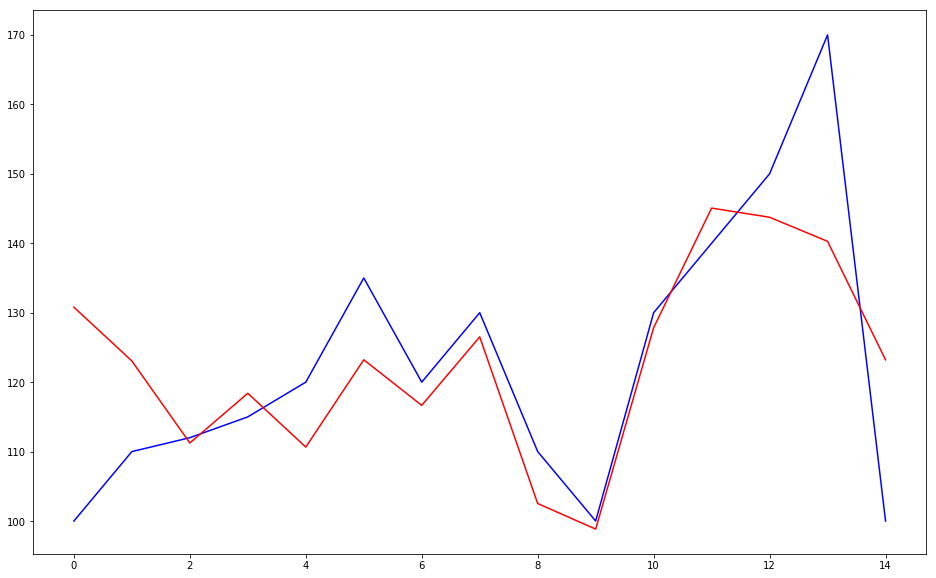

In [83]:
plt.plot(revenue, 'b')
plt.plot(pred, 'r')

In [102]:
#model 1
lr1 = LinearRegression(fit_intercept=True)
lr1.fit(consume.reshape(-1,1), revenue)
pred1 = lr1.predict(consume.reshape(-1,1))
error1 = np.abs(revenue-pred1)
spr1 = spearmanr(consume, error1).correlation
t1 = spr1 * np.sqrt(n - 2) / np.sqrt(1 - spr1**2)
print("error", error1)
print("spearmanr", spr1)
print("t", t1)

error [ 36.4714417   18.80521271   6.26414785   6.13898372   6.52724527
  14.81929491   2.09726234   3.11134454   2.27691702   2.93168986
  17.4855239   13.11134454   8.73716518  26.82060793  20.18070509]
spearmanr 0.479428316328
t 1.96973645733


In [103]:
#model 1
lr2 = LinearRegression(fit_intercept=True)
lr2.fit(price.reshape(-1,1), revenue)
pred2 = lr2.predict(price.reshape(-1,1))
error2 = np.abs(revenue-pred2)
spr2 = spearmanr(price, error2).correlation
t2 = spr2 * np.sqrt(n - 2) / np.sqrt(1 - spr2**2)
print("error", error2)
print("spearmanr", spr2)
print("t", t2)

error [ 22.4875      12.57272727  10.65795455   7.74318182   2.82840909
  12.08636364   2.65795455   7.25681818  12.82840909  22.91363636
   6.66022727  16.74545455  27.34204545  47.5125      22.91363636]
spearmanr -0.184123022536
t -0.675412385089


In [98]:
spr1

SpearmanrResult(correlation=0.47942831632755256, pvalue=masked_array(data = 0.07055414116249703,
             mask = False,
       fill_value = 1e+20)
)

In [106]:
st = scipy.stats.t.ppf(1-0.05,n)
st

1.7530503556925547